## Import Project Dependencies

In [1]:
import sys
sys.path.append("/home/dse/kaggle/py27xgboost/xgboost/python-package")
sys.path.append("/opt/conda/lib/python3.5/site-packages/ml_metrics-0.1.4-py3.5.egg")

In [13]:
# multiclass classification
from pandas import read_csv
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
import ml_metrics as metrics

In [3]:
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__)) # numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__)) # pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

scipy: 0.17.1
numpy: 1.10.4
matplotlib: 1.5.1
pandas: 0.17.1
sklearn: 0.17.1


## Load the Data Set

In [4]:
ames_train = pd.read_csv("../data/ames_train.csv")
ames_hold_out = pd.read_csv("../data/ames_test.csv")
ames_train.head(15)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


## Exploratory Data Analysis

### Descriptive Statistics

In [5]:
ames_train.shape

(1460, 81)

In [7]:
# data types for each attribute
ames_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [8]:
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
description = ames_train.describe()
print(description)

            Id  MSSubClass  LotFrontage     LotArea  OverallQual  OverallCond  YearBuilt  \
count  1460.00    1460.000     1201.000    1460.000     1460.000     1460.000   1460.000   
mean    730.50      56.897       70.050   10516.828        6.099        5.575   1971.268   
std     421.61      42.301       24.285    9981.265        1.383        1.113     30.203   
min       1.00      20.000       21.000    1300.000        1.000        1.000   1872.000   
25%     365.75      20.000       59.000    7553.500        5.000        5.000   1954.000   
50%     730.50      50.000       69.000    9478.500        6.000        5.000   1973.000   
75%    1095.25      70.000       80.000   11601.500        7.000        6.000   2000.000   
max    1460.00     190.000      313.000  215245.000       10.000        9.000   2010.000   

       YearRemodAdd  MasVnrArea  BsmtFinSF1     ...      WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count      1460.000    1452.000    1460.000     ...        1460.000     

## Correlations Between Attributes

In [9]:
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
correlations = ames_train.corr(method='pearson')
print(correlations)

                      Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
Id             1.000e+00       0.011       -0.011   -0.033       -0.028        0.013     -0.013   
MSSubClass     1.116e-02       1.000       -0.386   -0.140        0.033       -0.059      0.028   
LotFrontage   -1.060e-02      -0.386        1.000    0.426        0.252       -0.059      0.123   
LotArea       -3.323e-02      -0.140        0.426    1.000        0.106       -0.006      0.014   
OverallQual   -2.836e-02       0.033        0.252    0.106        1.000       -0.092      0.572   
OverallCond    1.261e-02      -0.059       -0.059   -0.006       -0.092        1.000     -0.376   
YearBuilt     -1.271e-02       0.028        0.123    0.014        0.572       -0.376      1.000   
YearRemodAdd  -2.200e-02       0.041        0.089    0.014        0.551        0.074      0.593   
MasVnrArea    -5.030e-02       0.023        0.193    0.104        0.412       -0.128      0.316   
BsmtFinSF1

## Skew of Univariate Distributions

In [11]:
# positive (right), zero show less skew and negative (left) skew
skew = ames_train.skew()
print(skew)

Id                0.000
MSSubClass        1.408
LotFrontage       2.164
LotArea          12.208
OverallQual       0.217
OverallCond       0.693
YearBuilt        -0.613
YearRemodAdd     -0.504
MasVnrArea        2.669
BsmtFinSF1        1.686
BsmtFinSF2        4.255
BsmtUnfSF         0.920
TotalBsmtSF       1.524
1stFlrSF          1.377
2ndFlrSF          0.813
LowQualFinSF      9.011
GrLivArea         1.367
BsmtFullBath      0.596
BsmtHalfBath      4.103
FullBath          0.037
HalfBath          0.676
BedroomAbvGr      0.212
KitchenAbvGr      4.488
TotRmsAbvGrd      0.676
Fireplaces        0.650
GarageYrBlt      -0.649
GarageCars       -0.343
GarageArea        0.180
WoodDeckSF        1.541
OpenPorchSF       2.364
EnclosedPorch     3.090
3SsnPorch        10.304
ScreenPorch       4.122
PoolArea         14.828
MiscVal          24.477
MoSold            0.212
YrSold            0.096
SalePrice         1.883
dtype: float64


### Data Visualizations

## Univariate Plots

In [ ]:
ames_train[:5].hist()
plt.show()

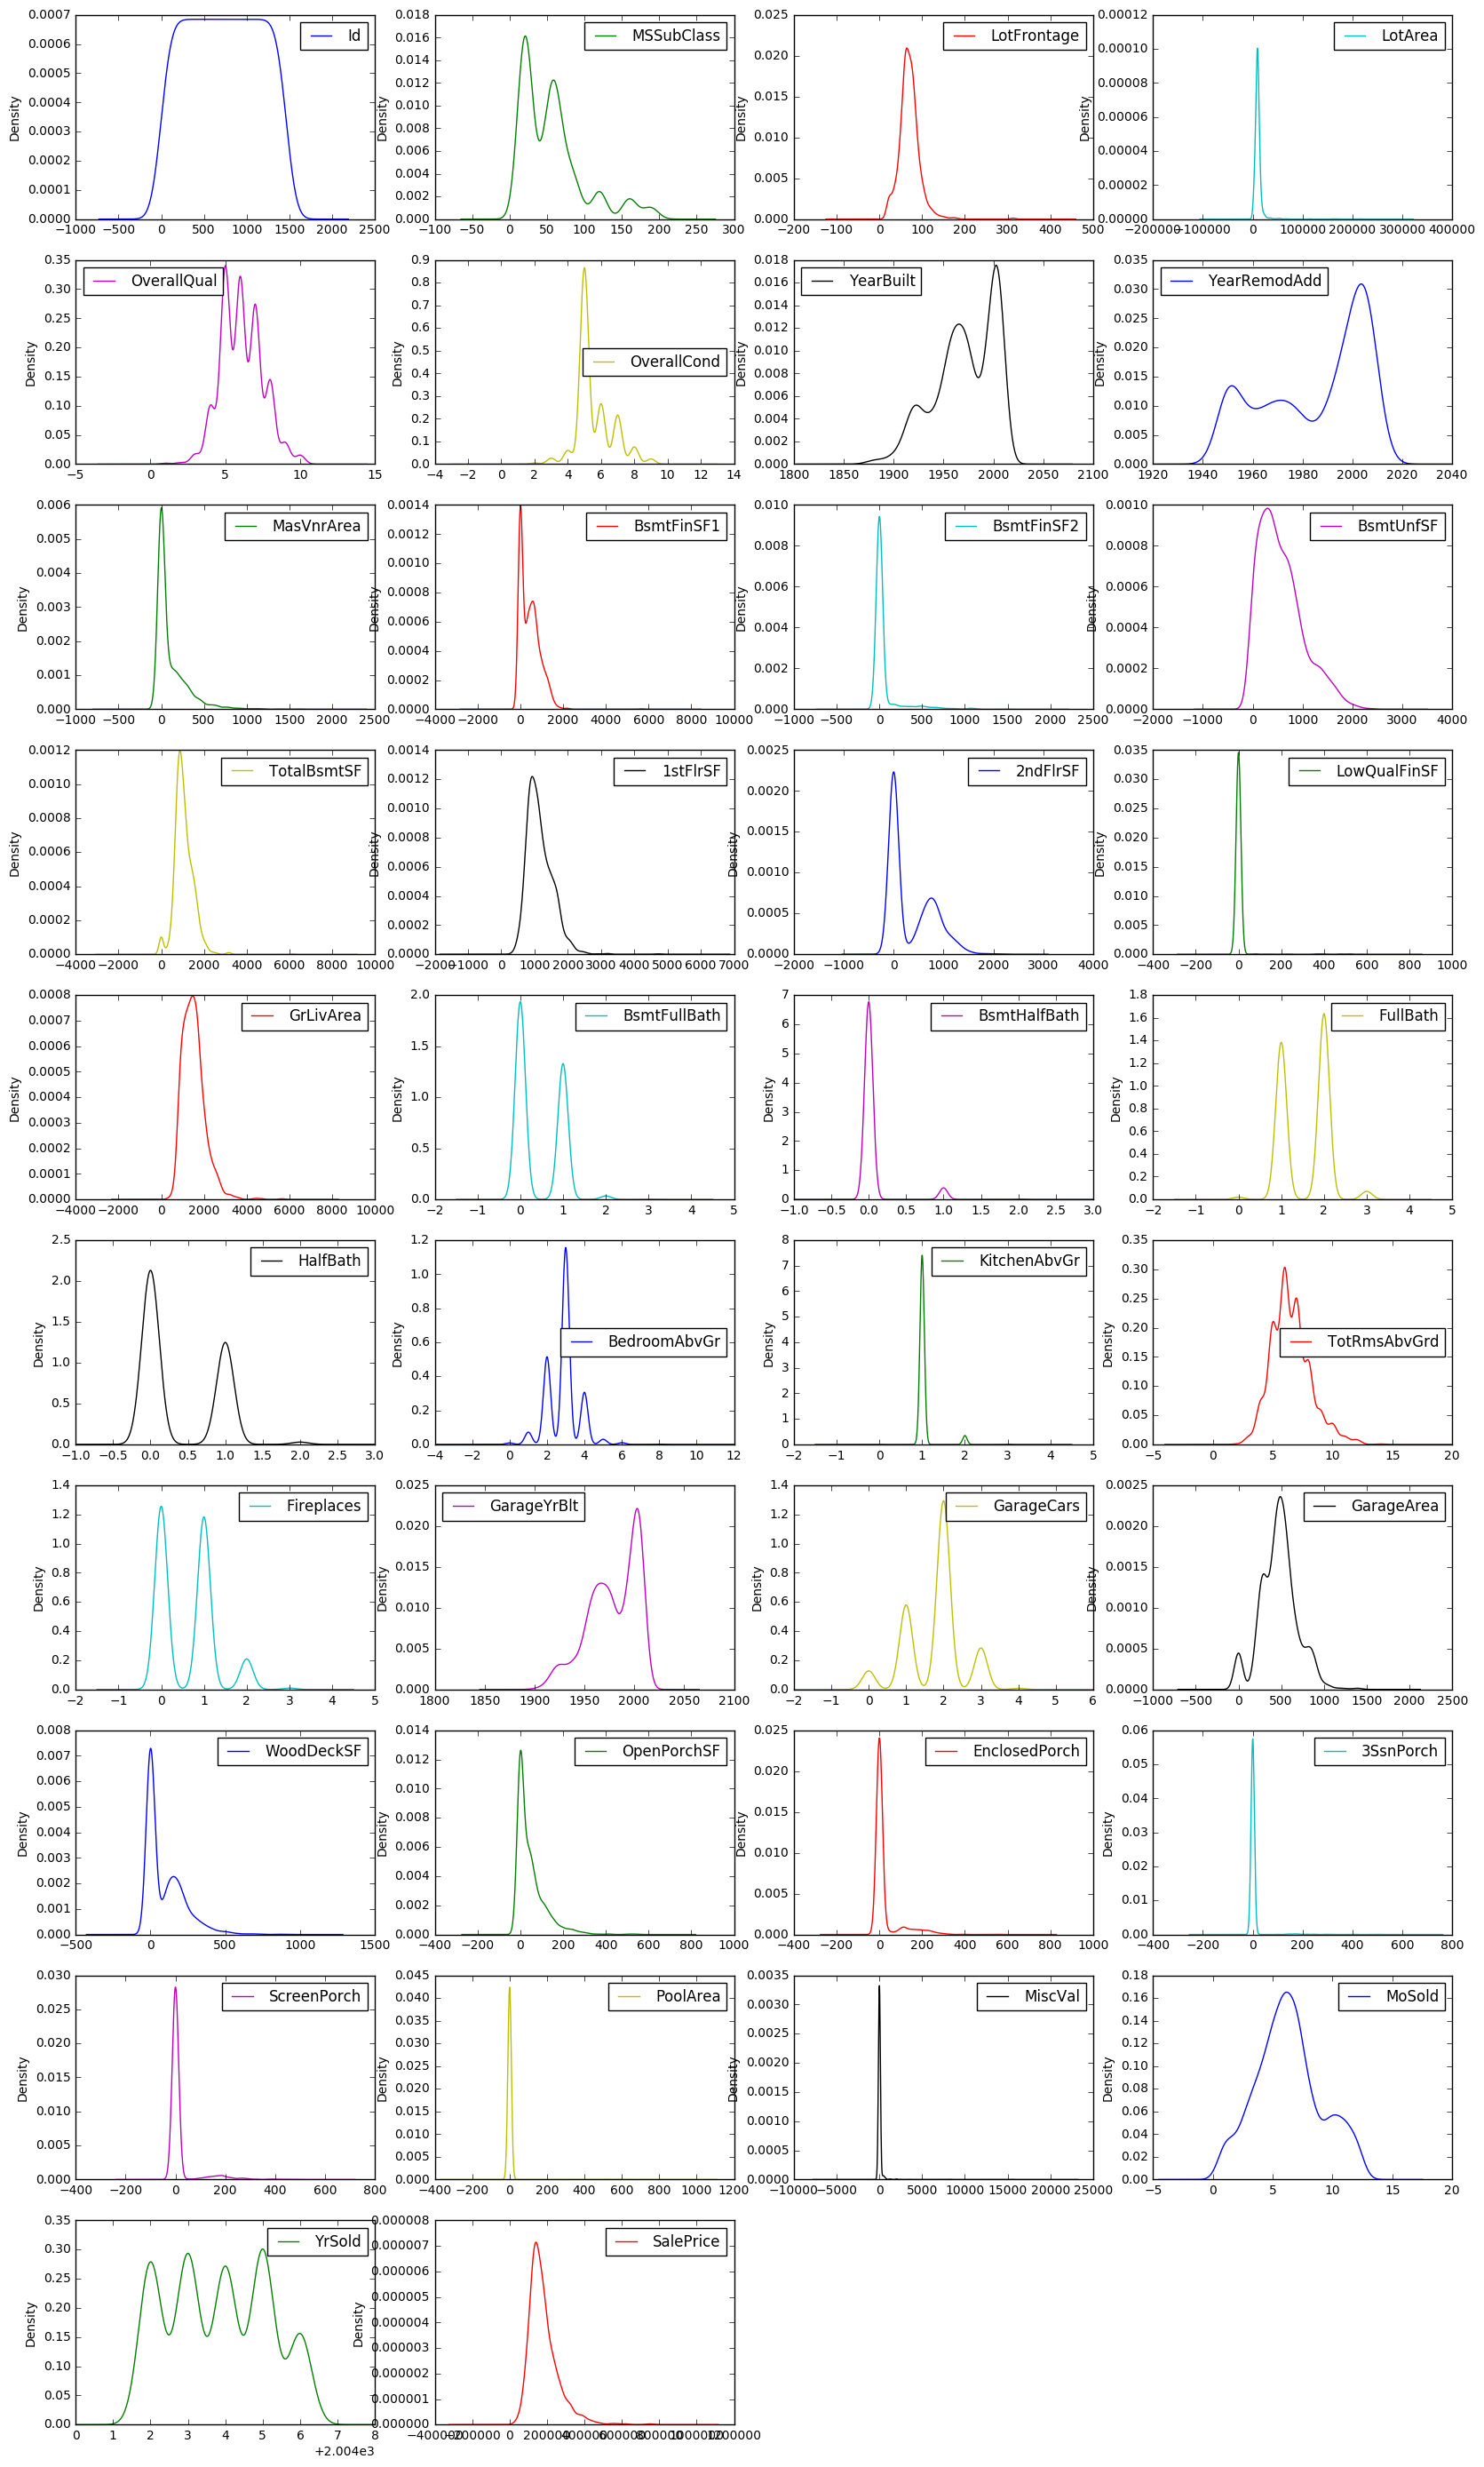

In [50]:
ames_train.plot(kind='density', figsize=(20, 35), layout=(10,4), subplots=True, sharex=False) 
plt.show()

**Box and Whisker Plots** summarize the distribution of each attribute, drawing a line for the median (middle value) and a box around the 25th and 75th percentiles (the middle 50% of the data). The whiskers give an idea of the spread of the data and dots outside of the whiskers show candidate outlier values (values that are 1.5 times greater than the size of spread of the middle 50% of the data).

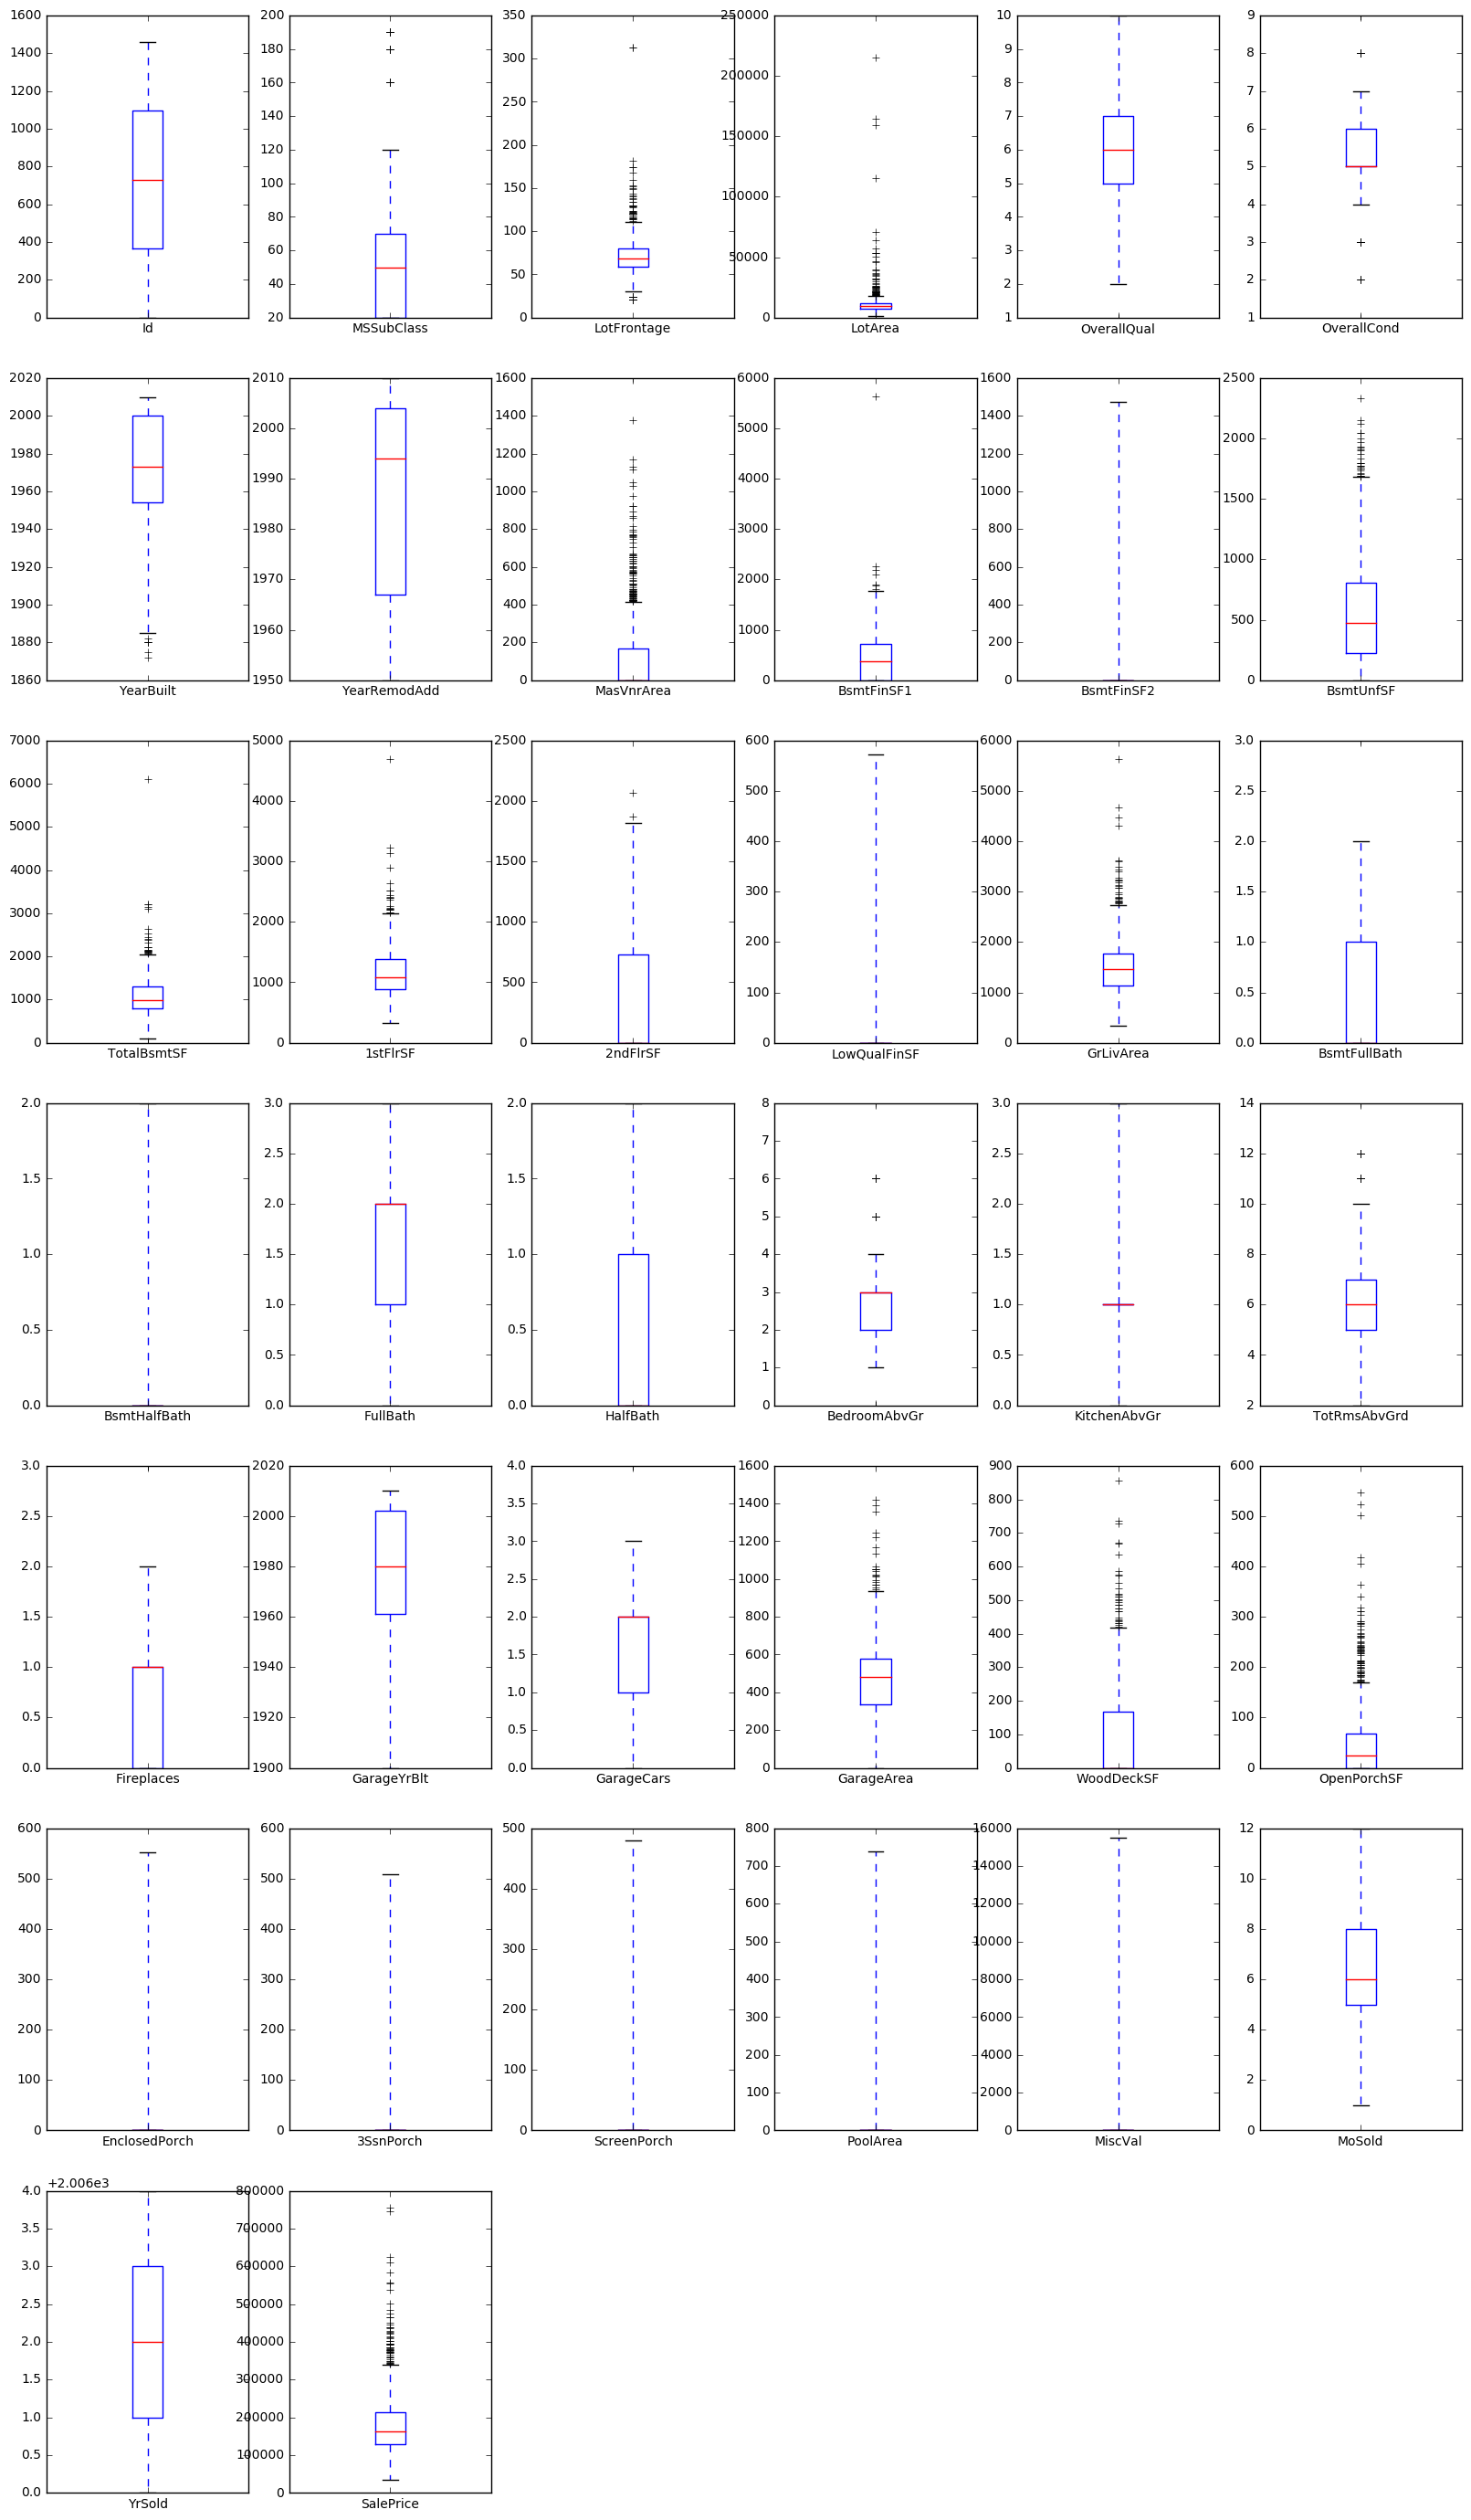

In [49]:
ames_train.plot(kind='box', subplots=True, figsize=(20, 35), layout=(7,6), sharex=False, sharey=False) 
plt.show()

### Multimodal Data Visualizations

In [5]:
categorical_features=['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities',
                      'LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle',
                      'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond',
                      'Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating',
                      'HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu',
                      'GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence',
                      'MiscFeature','SaleType','SaleCondition']
non_categorical_features = [col for col in ames_train.columns if col not in categorical_features and col not in ['Id']]
y = ames_train['SalePrice']

## Pre-Process Data

## Feature Selection

## Validation Dataset

In [21]:
encoded_categoricals_train = pd.get_dummies(ames_train,columns = categorical_features)
X_encoded_df = pd.concat([ames_train[non_categorical_features], encoded_categoricals_train], axis=1)

In [22]:
print (X_encoded_df.shape)
X_encoded_df.head()

(1460, 340)


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65,8450,7,5,2003,2003,196,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,80,9600,6,8,1976,1976,0,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,68,11250,7,5,2001,2002,162,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,60,9550,7,5,1915,1970,0,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,84,14260,8,5,2000,2000,350,655,0,490,...,0,0,0,1,0,0,0,0,1,0


In [27]:
X_encoded = X_encoded_df.values[:,0:2000]
X_encoded.shape

(1460, 340)

## Evaluate Algorithms

## Evaluate Algorithms with Standardization

## Algorithm Hyper-Parameter Tuning

## Ensemble Methods

## Tune Ensemble Methods

## Finalize Model

In [28]:
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y,
    test_size=test_size, random_state=seed)

In [ ]:
# fit model no training data
model = XGBClassifier()
%time model.fit(X_train, y_train)
print(model)

In [ ]:
# make predictions for test data
y_pred = model.predict(X_test)
%time predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))